## Define Inputs

Some inputs were given in the problem definition. List those here.

In [1]:
wmt_bond_years = 15
wmt_bond_coupon = .0525
wmt_bond_price = 130.58
wmt_bond_par = 100
risk_free = 0.005
wmt_price = 119.51
wmt_shrout = 2850000000
libor_rate = 0.0196

## Cost of Equity

Load in the price data for S&P 500 and Walmart.

In [2]:
import pandas as pd
sp_prices = pd.read_excel('SP500 Prices.xlsx')
wmt_prices = pd.read_excel('WMT Prices.xlsx')

In [3]:
sp_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-11-06,2023.329956,2031.609985,2015.859985,2031.209961,2031.209961,3669770000
1,2014-11-07,2032.359985,2034.260010,2025.069946,2031.920044,2031.920044,3704280000
2,2014-11-10,2032.010010,2038.699951,2030.170044,2038.260010,2038.260010,3284940000
3,2014-11-11,2038.199951,2041.280029,2035.280029,2039.680054,2039.680054,2958320000
4,2014-11-12,2037.750000,2040.329956,2031.949951,2038.250000,2038.250000,3246650000


In [4]:
sp_prices.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
1256,2019-11-04,3078.959961,3085.199951,3074.870117,3078.270020,3078.270020,4146850000
1257,2019-11-05,3080.800049,3083.949951,3072.149902,3074.620117,3074.620117,4486130000


In [5]:
wmt_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-11-06,78.150002,78.180000,77.169998,77.809998,68.586304,4621900
1,2014-11-07,77.839996,79.080002,77.610001,78.769997,69.432503,9498800
2,2014-11-10,78.599998,80.129997,78.419998,79.440002,70.023087,12640500
3,2014-11-11,79.400002,79.419998,78.849998,79.010002,69.644073,5602400
4,2014-11-12,78.830002,79.440002,78.650002,79.199997,69.811539,6791200


In [6]:
wmt_prices.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
1256,2019-11-04,118.400002,119.110001,117.169998,117.570000,117.570000,4626500
1257,2019-11-05,117.680000,119.139999,117.080002,118.860001,118.860001,4215600


We only care about adjusted close. The two `DataFrames` dates line up so we can simply concat them. 

In [7]:
prices = pd.concat([sp_prices['Adj Close'], wmt_prices['Adj Close']], axis=1)
prices.columns = ['SP500', 'WMT']
prices.head()

,SP500,WMT
0,2031.209961,68.586304
1,2031.920044,69.432503
2,2038.260010,70.023087
3,2039.680054,69.644073
4,2038.250000,69.811539


Calculate returns.

In [8]:
returns = prices.pct_change().dropna()
returns.head()

,SP500,WMT
1,0.000350,0.012338
2,0.003120,0.008506
3,0.000697,-0.005413
4,-0.000701,0.002405
5,0.000530,0.047222


Calculate MRP.

In [9]:
returns['MRP'] = returns['SP500'] - risk_free / 252
returns.head()

,SP500,WMT,MRP
1,0.000350,0.012338,0.000330
2,0.003120,0.008506,0.003100
3,0.000697,-0.005413,0.000677
4,-0.000701,0.002405,-0.000721
5,0.000530,0.047222,0.000510


In [10]:
import statsmodels.api as sm

model = sm.OLS(returns['WMT'], sm.add_constant(returns['MRP']), hasconst=True)
results = model.fit()
results.summary()

c:\users\admin\.virtualenvs\fin-model-course-gvj3lsuv\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WMT   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     280.6
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           5.38e-57
Time:                        10:32:36   Log-Likelihood:                 3854.8
No. Observations:                1257   AIC:                            -7706.
Df Residuals:                    1255   BIC:                            -7695.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.938      0.348      -0.000       0.001
MRP            0.6248      0.037     16.751      0.000       0.552       0.698
==============================================================================
Omnibus:                      383.484   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26747.784
Skew:                           0.480   Prob(JB):                         0.00
Kurtosis:                      25.578   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
beta = results.params['MRP']
beta

0.6248324465315509

Calculate historical average of market returns and annualize.

In [12]:
mkt_ret = returns['SP500'].mean() * 252
mkt_ret

0.0923072636525422

Calculate CAPM

In [13]:
cost_of_equity = risk_free + beta * (mkt_ret - risk_free)
print(f'The cost of equity for Walmart is {cost_of_equity:.3%}')

The cost of equity for Walmart is 5.955%


## Market Value of Equity

In [14]:
mv_equity = wmt_price * wmt_shrout
print(f'WMT has a market cap of ${mv_equity:,.0f}')

WMT has a market cap of $340,603,500,000


## Load Info from Financial Statements

### Balance Sheet

In [15]:
wmt_bs = pd.read_excel('WMT Balance Sheet.xlsx', index_col=0)
wmt_bs.head()

,2010-01-31,2010-04-30,2010-07-31,2010-10-31,2011-01-31,2011-04-30,2011-07-31,2011-10-31,2012-01-31,2012-04-30,...,2017-04-30,2017-07-31,2017-10-31,2018-01-31,2018-04-30,2018-07-31,2018-10-31,2019-01-31,2019-04-30,2019-07-31
Cash and cash equivalents,7907000000,8516000000,10195000000,10616000000,7395000000,9400000000,8102000000,7063000000,6550000000,8117000000,...,6545000000,6469000000,7026000000,6756000000,7885000000,15840000000,9174000000,7722000000,9255000000,9283000000
Short-term investments,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cash and short-term investments,7907000000,8516000000,10195000000,10616000000,7395000000,9400000000,8102000000,7063000000,6550000000,8117000000,...,6545000000,6469000000,7026000000,6756000000,7885000000,15840000000,9174000000,7722000000,9255000000,9283000000
Receivables,4144000000,4235000000,4531000000,4374000000,5089000000,4785000000,5265000000,4757000000,5937000000,5574000000,...,5252000000,5395000000,5865000000,5614000000,4568000000,5002000000,5785000000,6283000000,5342000000,5382000000
Inventories,32713000000,35021000000,34793000000,41059000000,36437000000,38495000000,38867000000,44340000000,40714000000,41284000000,...,43361000000,43442000000,50147000000,43783000000,43303000000,41985000000,50380000000,44269000000,44751000000,44134000000


We only need the latest values.

In [16]:
wmt_bs = wmt_bs.iloc[:,-1]
wmt_bs

Cash and cash equivalents            9283000000
Short-term investments                        0
Cash and short-term investments      9283000000
Receivables                          5382000000
Inventories                         44134000000
Total current assets                61371000000
Property, Plant & Equipment Net    125862000000
Goodwill and Intangible Assets      31454000000
Long-term investments                         0
Tax assets                                    0
Total non-current assets           173490000000
Total assets                       234861000000
Payables                            45871000000
Short-term debt                     10311000000
Total current liabilities           80283000000
Long-term debt                      64398000000
Total debt                          74709000000
Deferred revenue                              0
Tax Liabilities                     13436000000
Deposit Liabilities                           0
Total non-current liabilities       7744

### Income Statement

In [17]:
wmt_is = pd.read_excel('WMT Income Statement.xlsx', index_col=0)
wmt_is.head()

,2010-01-31,2010-04-30,2010-07-31,2010-10-31,2011-01-31,2011-04-30,2011-07-31,2011-10-31,2012-01-31,2012-04-30,...,2017-04-30,2017-07-31,2017-10-31,2018-01-31,2018-04-30,2018-07-31,2018-10-31,2019-01-31,2019-04-30,2019-07-31
Revenue,1.136220e+11,9.981100e+10,1.037260e+11,1.019520e+11,1.163600e+11,1.041890e+11,1.093660e+11,1.102260e+11,1.227280e+11,1.130100e+11,...,1.175420e+11,1.233550e+11,1.231790e+11,1.362670e+11,1.226900e+11,1.280280e+11,1.248940e+11,1.387930e+11,1.239250e+11,1.303770e+11
Revenue Growth,4.600000e-02,5.910000e-02,2.830000e-02,2.600000e-02,2.410000e-02,4.390000e-02,5.440000e-02,8.120000e-02,5.470000e-02,8.470000e-02,...,1.410000e-02,2.070000e-02,4.230000e-02,4.070000e-02,4.380000e-02,3.790000e-02,1.390000e-02,1.850000e-02,1.010000e-02,1.830000e-02
Cost of Revenue,8.474000e+10,7.461800e+10,7.743800e+10,7.581900e+10,8.707100e+10,7.817700e+10,8.177000e+10,8.259100e+10,9.245500e+10,8.517800e+10,...,8.768800e+10,9.152100e+10,9.154700e+10,1.026400e+11,9.170700e+10,9.557100e+10,9.311600e+10,1.049070e+11,9.303400e+10,9.792300e+10
Gross Profit,2.888200e+10,2.519300e+10,2.628800e+10,2.613300e+10,2.928900e+10,2.601200e+10,2.759600e+10,2.763500e+10,3.027300e+10,2.783200e+10,...,2.985400e+10,3.183400e+10,3.163200e+10,3.362700e+10,3.098300e+10,3.245700e+10,3.177800e+10,3.388600e+10,3.089100e+10,3.245400e+10
R&D Expenses,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [18]:
wmt_is = wmt_is.iloc[:,-1]
wmt_is

Revenue                             1.303770e+11
Revenue Growth                      1.830000e-02
Cost of Revenue                     9.792300e+10
Gross Profit                        3.245400e+10
R&D Expenses                        0.000000e+00
SG&A Expense                        2.687100e+10
Operating Expenses                  2.687100e+10
Operating Income                    5.583000e+09
Interest Expense                    6.410000e+08
Earnings before Tax                 4.843000e+09
Income Tax Expense                  1.233000e+09
Net Income - Non-Controlling int    7.000000e+07
Net Income - Discontinued ops       0.000000e+00
Net Income                          3.610000e+09
Preferred Dividends                 0.000000e+00
Net Income Com                      3.610000e+09
EPS                                 1.270000e+00
EPS Diluted                         1.260000e+00
Shares (basic)                      2.854722e+09
Shares (weighted)                   2.853000e+09
Shares (weighted, di

### Calculate Tax Rate

In [19]:
wmt_is

Revenue                             1.303770e+11
Revenue Growth                      1.830000e-02
Cost of Revenue                     9.792300e+10
Gross Profit                        3.245400e+10
R&D Expenses                        0.000000e+00
SG&A Expense                        2.687100e+10
Operating Expenses                  2.687100e+10
Operating Income                    5.583000e+09
Interest Expense                    6.410000e+08
Earnings before Tax                 4.843000e+09
Income Tax Expense                  1.233000e+09
Net Income - Non-Controlling int    7.000000e+07
Net Income - Discontinued ops       0.000000e+00
Net Income                          3.610000e+09
Preferred Dividends                 0.000000e+00
Net Income Com                      3.610000e+09
EPS                                 1.270000e+00
EPS Diluted                         1.260000e+00
Shares (basic)                      2.854722e+09
Shares (weighted)                   2.853000e+09
Shares (weighted, di

In [20]:
tax_rate = wmt_is['Income Tax Expense'] / wmt_is['Earnings before Tax']
tax_rate

0.25459425975634936

## Cost of Debt

Use the current bond info to calculate the cost of debt.

In [21]:
coupon_payment = wmt_bond_coupon * wmt_bond_par
cash_flows = [coupon_payment for i in range(wmt_bond_years - 1)] + [coupon_payment + wmt_bond_par]
cash_flows

[5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 105.25]

In [22]:
import numpy as np
pretax_cost_of_debt = np.irr([-wmt_bond_price] + cash_flows)
pretax_cost_of_debt

0.027369148593149095

In [23]:
aftertax_cost_of_debt = pretax_cost_of_debt * (1 - tax_rate)
print(f"Walmart's pre-tax cost of debt is {pretax_cost_of_debt:.2%} and after-tax cost of debt is {aftertax_cost_of_debt:.2%}.")

Walmart's pre-tax cost of debt is 2.74% and after-tax cost of debt is 2.04%.


## Market Value of Debt

Load in debt details. After some trial and error, found that the first 12 rows should be skipped.

In [24]:
debt_details = pd.read_excel('WMT Debt Details.xls', skiprows=12)

Now need to remove the second table. The second table starts with Description in the Description column. Then we also want to remove one row above that which has the FY 2019. Then we want to trim the blanks off the bottom.

In [25]:
fy_row_index = debt_details[debt_details['Description'] == 'Description'].index.values[0] - 1
debt_details = debt_details.iloc[:fy_row_index].dropna(how='all')

In [26]:
debt_details.head()

,Description,Type,Principal Due (USD),Coupon/Base Rate,Floating Rate,Maturity,Seniority,Secured,Convertible,Repayment Currency
0,"0.183% Unsecured Note Due in July 15, 2022, JPY *",Bonds and Notes,619,0.183%,NaN,2022-07-15 00:00:00,Senior,No,No,JPY
1,"0.298% Unsecured Note Due in July 18, 2024, JPY *",Bonds and Notes,354,0.298%,NaN,2024-07-18 00:00:00,Senior,No,No,JPY
2,"0.520% Unsecured Note Due in July 16, 2027, JPY *",Bonds and Notes,530,0.520%,NaN,2027-07-16 00:00:00,Senior,No,No,JPY
3,1.60% Unsecured Fixed Rate Japanese Yen Bond *,Bonds and Notes,88,1.600%,NaN,2020-07-28 00:00:00,Senior,No,No,JPY
4,"1.750% Unsecured Note Due in October 9, 2019 U...",Bonds and Notes,1198,1.750%,NaN,2019-10-09 00:00:00,Senior,No,No,USD


In [27]:
debt_details.tail()

,Description,Type,Principal Due (USD),Coupon/Base Rate,Floating Rate,Maturity,Seniority,Secured,Convertible,Repayment Currency
57,"Senior, Unsecured Notes",Bonds and Notes,42,NaN,NaN,-,Senior,No,No,USD
58,"Senior, Unsecured Notes",Bonds and Notes,1243,3.250%,NaN,2029-07-08 00:00:00,Senior,No,No,USD
59,"Senior, Unsecured Notes",Bonds and Notes,1242,3.050%,NaN,2026-07-08 00:00:00,Senior,No,No,USD
60,"Senior, Unsecured Notes",Bonds and Notes,1493,2.850%,NaN,2024-07-08 00:00:00,Senior,No,No,USD
61,Short-Term Borrowings,Other Borrowings,3681,NaN,NaN,2020-07-31 00:00:00,Senior,No,No,USD


Now we have the right rows. But we have some "-" which actually should be missing.

In [28]:
debt_details = debt_details.replace('-', np.nan)

### Check if Approach is Valid

In [29]:
debt_details['Principal Due (USD)'].sum()

76339.20000000001

This is actually in millions. So that's 76 billion.

In [30]:
wmt_bs['Total debt']

74709000000

In [31]:
(debt_details['Principal Due (USD)'].sum() * 1000000 - wmt_bs['Total debt']) / wmt_bs['Total debt']

0.02182066417700699

Only 2% different, good enough.

### Clean up Coupons

In [32]:
debt_details.dtypes

Description             object
Type                    object
Principal Due (USD)    float64
Coupon/Base Rate        object
Floating Rate           object
Maturity                object
Seniority               object
Secured                 object
Convertible             object
Repayment Currency      object
dtype: object

We can see coupons are not numbers right now. This is due to the coupon ranges. Also we have both floating rates and fixed rates, and since we have the LIBOR rate we can combine them all into one set of fixed coupons. For the ranges, we'll take the average of the range.

In [33]:
import re

# Regular expressions are outside the scope of the course, but they are very powerful
range_pattern = re.compile('([\d.]+)% - ([\d.]+)%')

def standardize_fixed_coupons(coupon_str):
    """
    Strips percentages, takes averages of percentage ranges
    """
    # Handle missing values
    if pd.isnull(coupon_str):
        return coupon_str
    
    # More regular expression stuff. Extract the two percentages and take the average
    match = range_pattern.match(coupon_str)
    if match:
        bottom_pct = float(match.group(1))
        top_pct = float(match.group(2))
        return (top_pct + bottom_pct) / 2
    
    # Single percentage
    return float(coupon_str.strip('%'))


debt_details['Coupon/Base Rate'] = debt_details['Coupon/Base Rate'].apply(standardize_fixed_coupons)

In [34]:
# Regular expressions are outside the scope of the course, but they are very powerful
libor_pattern = re.compile('LIBOR \+ ([\d.]+)%')

def standardize_floating_coupons(coupon_str):
    """
    Extracts percentages from string with LIBOR + pct, and fills in the value of LIBOR
    """
    # Handle missing values
    if pd.isnull(coupon_str):
        return coupon_str
    
    # More regular expression stuff. Extract the two percentages and take the average
    match = libor_pattern.match(coupon_str)
    if match:
        pct = float(match.group(1))
        return (libor_rate * 100) + pct
    
    # Shouldn't be hitting here on the current data
    return float(coupon_str.strip('%'))

debt_details['Floating Rate'] = debt_details['Floating Rate'].apply(standardize_floating_coupons)

Now the last step is to create one column which combines the two.

In [35]:
debt_details['Coupon'] = debt_details['Coupon/Base Rate'].fillna(debt_details['Floating Rate'])
debt_details['Coupon'] = debt_details['Coupon'] / 100
debt_details.head()

,Description,Type,Principal Due (USD),Coupon/Base Rate,Floating Rate,Maturity,Seniority,Secured,Convertible,Repayment Currency,Coupon
0,"0.183% Unsecured Note Due in July 15, 2022, JPY *",Bonds and Notes,619.0,0.183,NaN,2022-07-15 00:00:00,Senior,No,No,JPY,0.00183
1,"0.298% Unsecured Note Due in July 18, 2024, JPY *",Bonds and Notes,354.0,0.298,NaN,2024-07-18 00:00:00,Senior,No,No,JPY,0.00298
2,"0.520% Unsecured Note Due in July 16, 2027, JPY *",Bonds and Notes,530.0,0.520,NaN,2027-07-16 00:00:00,Senior,No,No,JPY,0.00520
3,1.60% Unsecured Fixed Rate Japanese Yen Bond *,Bonds and Notes,88.0,1.600,NaN,2020-07-28 00:00:00,Senior,No,No,JPY,0.01600
4,"1.750% Unsecured Note Due in October 9, 2019 U...",Bonds and Notes,1198.0,1.750,NaN,2019-10-09 00:00:00,Senior,No,No,USD,0.01750


### Calculate Years to Maturity

In [36]:
debt_details.dtypes

Description             object
Type                    object
Principal Due (USD)    float64
Coupon/Base Rate       float64
Floating Rate          float64
Maturity                object
Seniority               object
Secured                 object
Convertible             object
Repayment Currency      object
Coupon                 float64
dtype: object

Maturity is still `object` so let's convert it. For some rows, it has only years and not dates. We need to handle those before passing to `pd.to_datetime`

In [37]:

def standardize_maturity_dates(maturity):
    """
    Converts years into end of year
    """
    # Handle missing values and existing dates
    if not isinstance(maturity, (str, int)):
        return maturity
    
    # More regular expression stuff. Identify when it's just a year and create a date out of it
    if isinstance(maturity, int):
        return pd.to_datetime(f'Dec-31-{maturity}')
    
    # Regular date str
    return maturity

debt_details['Maturity'] = debt_details['Maturity'].apply(standardize_maturity_dates)

In [38]:
debt_details.head()

,Description,Type,Principal Due (USD),Coupon/Base Rate,Floating Rate,Maturity,Seniority,Secured,Convertible,Repayment Currency,Coupon
0,"0.183% Unsecured Note Due in July 15, 2022, JPY *",Bonds and Notes,619.0,0.183,NaN,2022-07-15,Senior,No,No,JPY,0.00183
1,"0.298% Unsecured Note Due in July 18, 2024, JPY *",Bonds and Notes,354.0,0.298,NaN,2024-07-18,Senior,No,No,JPY,0.00298
2,"0.520% Unsecured Note Due in July 16, 2027, JPY *",Bonds and Notes,530.0,0.520,NaN,2027-07-16,Senior,No,No,JPY,0.00520
3,1.60% Unsecured Fixed Rate Japanese Yen Bond *,Bonds and Notes,88.0,1.600,NaN,2020-07-28,Senior,No,No,JPY,0.01600
4,"1.750% Unsecured Note Due in October 9, 2019 U...",Bonds and Notes,1198.0,1.750,NaN,2019-10-09,Senior,No,No,USD,0.01750


Now calculate the maturity years.

In [39]:
import datetime

def years_until_from_date(date):
    """
    Calculate the number of years until a date, starting from today.
    """
    today = datetime.datetime.today()
#     today = datetime.datetime(2019, 11, 7)
    diff = date - today
    seconds = diff.total_seconds()
    seconds_per_year = 60 * 60 * 24 * 365
    years_elapsed = seconds / seconds_per_year
    return years_elapsed

debt_details['Maturity (years)'] = debt_details['Maturity'].apply(years_until_from_date)

In [40]:
debt_details.head()

,Description,Type,Principal Due (USD),Coupon/Base Rate,Floating Rate,Maturity,Seniority,Secured,Convertible,Repayment Currency,Coupon,Maturity (years)
0,"0.183% Unsecured Note Due in July 15, 2022, JPY *",Bonds and Notes,619.0,0.183,NaN,2022-07-15,Senior,No,No,JPY,0.00183,2.615235
1,"0.298% Unsecured Note Due in July 18, 2024, JPY *",Bonds and Notes,354.0,0.298,NaN,2024-07-18,Senior,No,No,JPY,0.00298,4.626194
2,"0.520% Unsecured Note Due in July 16, 2027, JPY *",Bonds and Notes,530.0,0.520,NaN,2027-07-16,Senior,No,No,JPY,0.00520,7.620714
3,1.60% Unsecured Fixed Rate Japanese Yen Bond *,Bonds and Notes,88.0,1.600,NaN,2020-07-28,Senior,No,No,JPY,0.01600,0.650851
4,"1.750% Unsecured Note Due in October 9, 2019 U...",Bonds and Notes,1198.0,1.750,NaN,2019-10-09,Senior,No,No,USD,0.01750,-0.151889


## Calculate the Value of Bonds

Some of the rows are not valid. Either they are missing a coupon or they have already expired (negative maturity). Flag these rows as we will want to just use the principal as the market value for these rows.

In [41]:
debt_details['Valid'] = True

# Set the value of Valid for the matching rows to False
debt_details.loc[
    pd.isnull(debt_details['Coupon']) | 
    pd.isnull(debt_details['Maturity (years)']) |
    (debt_details['Maturity (years)'] < 0),
    'Valid'
] = False

debt_details.head()

,Description,Type,Principal Due (USD),Coupon/Base Rate,Floating Rate,Maturity,Seniority,Secured,Convertible,Repayment Currency,Coupon,Maturity (years),Valid
0,"0.183% Unsecured Note Due in July 15, 2022, JPY *",Bonds and Notes,619.0,0.183,NaN,2022-07-15,Senior,No,No,JPY,0.00183,2.615235,True
1,"0.298% Unsecured Note Due in July 18, 2024, JPY *",Bonds and Notes,354.0,0.298,NaN,2024-07-18,Senior,No,No,JPY,0.00298,4.626194,True
2,"0.520% Unsecured Note Due in July 16, 2027, JPY *",Bonds and Notes,530.0,0.520,NaN,2027-07-16,Senior,No,No,JPY,0.00520,7.620714,True
3,1.60% Unsecured Fixed Rate Japanese Yen Bond *,Bonds and Notes,88.0,1.600,NaN,2020-07-28,Senior,No,No,JPY,0.01600,0.650851,True
4,"1.750% Unsecured Note Due in October 9, 2019 U...",Bonds and Notes,1198.0,1.750,NaN,2019-10-09,Senior,No,No,USD,0.01750,-0.151889,False


In [42]:
def mv_bond_annuity_approach(principal, coupon_rate, maturity, cost_of_debt):
    """
    Calculate the market value of bond with non-integer maturity
    """
    coupon_payment = coupon_rate * principal
    return coupon_payment * ((1 - (1 + cost_of_debt)**(-maturity))/cost_of_debt) + principal/(1 + cost_of_debt)**maturity


def mv_bond_annuity_approach_for_apply(series):
    """
    Calculate market value of a bond with non-integer maturity. This version to be used with DataFrame.apply
    """
    principal = series['Principal Due (USD)']
    coupon_rate = series['Coupon']
    maturity = series['Maturity (years)']
    valid = series['Valid']
    if not valid:
        return principal
    return mv_bond_annuity_approach(principal, coupon_rate, maturity, pretax_cost_of_debt)  # Note that I used the global cost_of_debt because we don't have a different one for each row

debt_details['Value'] = debt_details.apply(mv_bond_annuity_approach_for_apply, axis=1)

In [43]:
debt_details.head()

,Description,Type,Principal Due (USD),Coupon/Base Rate,Floating Rate,Maturity,Seniority,Secured,Convertible,Repayment Currency,Coupon,Maturity (years),Valid,Value
0,"0.183% Unsecured Note Due in July 15, 2022, JPY *",Bonds and Notes,619.0,0.183,NaN,2022-07-15,Senior,No,No,JPY,0.00183,2.615235,True,579.618911
1,"0.298% Unsecured Note Due in July 18, 2024, JPY *",Bonds and Notes,354.0,0.298,NaN,2024-07-18,Senior,No,No,JPY,0.00298,4.626194,True,316.957099
2,"0.520% Unsecured Note Due in July 16, 2027, JPY *",Bonds and Notes,530.0,0.520,NaN,2027-07-16,Senior,No,No,JPY,0.00520,7.620714,True,450.158664
3,1.60% Unsecured Fixed Rate Japanese Yen Bond *,Bonds and Notes,88.0,1.600,NaN,2020-07-28,Senior,No,No,JPY,0.01600,0.650851,True,87.363197
4,"1.750% Unsecured Note Due in October 9, 2019 U...",Bonds and Notes,1198.0,1.750,NaN,2019-10-09,Senior,No,No,USD,0.01750,-0.151889,False,1198.000000


In [44]:
debt_details[~debt_details['Valid']]

,Description,Type,Principal Due (USD),Coupon/Base Rate,Floating Rate,Maturity,Seniority,Secured,Convertible,Repayment Currency,Coupon,Maturity (years),Valid,Value
4,"1.750% Unsecured Note Due in October 9, 2019 U...",Bonds and Notes,1198.0,1.75,NaN,2019-10-09,Senior,No,No,USD,0.0175,-0.151889,False,1198.0
16,364-Day Revolving Credit Facility,Revolving Credit,NaN,NaN,2.71,NaT,Senior,No,No,USD,0.0271,NaN,False,NaN
43,Finance Leases,Capital Lease,4354.0,9.20,NaN,NaT,Senior,Yes,No,USD,0.0920,NaN,False,4354.0
45,"Floating Unsecured Note Due in October 9, 2019...",Bonds and Notes,299.0,NaN,NaN,2019-10-09,Senior,No,No,USD,NaN,-0.151889,False,299.0
46,Operating Leases,Capital Lease,17874.0,5.30,NaN,NaT,Senior,Yes,No,USD,0.0530,NaN,False,17874.0
47,Senior Unsecured Notes *,Bonds and Notes,748.0,NaN,NaN,2021-06-23,Senior,No,No,USD,NaN,1.554961,False,748.0
54,Senior Unsecured Notes *,Bonds and Notes,748.0,NaN,NaN,2020-06-23,Senior,No,No,USD,NaN,0.554961,False,748.0
56,Senior Unsecured Notes *,Bonds and Notes,21.0,NaN,NaN,NaT,Senior,No,No,USD,NaN,NaN,False,21.0
57,"Senior, Unsecured Notes",Bonds and Notes,42.0,NaN,NaN,NaT,Senior,No,No,USD,NaN,NaN,False,42.0
61,Short-Term Borrowings,Other Borrowings,3681.0,NaN,NaN,2020-07-31,Senior,No,No,USD,NaN,0.659070,False,3681.0


In [45]:
mv_debt = debt_details['Value'].sum() * 1000000
print(f'The market value of debt for Walmart is ${mv_debt:,.0f}')

The market value of debt for Walmart is $82,991,904,524


In [62]:
debt_details.to_excel('evaluated debt details.xlsx')

# Calculate WACC

In [47]:
total_capital = mv_equity + mv_debt
weight_equity = mv_equity / total_capital
weight_debt = mv_debt / total_capital

wacc = cost_of_equity * weight_equity + aftertax_cost_of_debt * weight_debt
print(f'The WACC for Walmart is {wacc:.2%}')

The WACC for Walmart is 5.19%


# Monte Carlo Simulations

Let's wrap up the parts of the model that we need to re-run for the Monte Carlo Simulations. We need to recalculate the cost of debt and MV of debt from the changing bond price. We also need to recalculate the cost of equity from changing beta and market return. Then we need to recalculate the WACC from those parts.

In [48]:
def after_tax_cost_debt(wmt_bond_price, tax_rate):
    coupon_payment = wmt_bond_coupon * wmt_bond_par
    cash_flows = [coupon_payment for i in range(wmt_bond_years - 1)] + [coupon_payment + wmt_bond_par]
    pretax_cost_of_debt = np.irr([-wmt_bond_price] + cash_flows)
    aftertax_cost_of_debt = pretax_cost_of_debt * (1 - tax_rate)
    return aftertax_cost_of_debt

after_tax_cost_debt(130.58, 0.4)

0.016421489155889455

In [49]:
after_tax_cost_debt(90, 0.2)

0.050399184495231536

In [50]:
debt_details.apply(mv_bond_annuity_approach_for_apply, axis=1).sum() * 1000000

82991904524.13521

Because that's using the global `aftertax_cost_of_debt`, it will change after I redefine that.

In [51]:
aftertax_cost_of_debt = after_tax_cost_debt(90, tax_rate)

In [52]:
debt_details.apply(mv_bond_annuity_approach_for_apply, axis=1).sum() * 1000000

82991904524.13521

In [53]:
new_bond_price = 100
new_beta = 1
new_mkt_ret = 0.1
new_tax = 0.4


aftertax_cost_of_debt = after_tax_cost_debt(new_bond_price, new_tax)
mv_debt = debt_details.apply(mv_bond_annuity_approach_for_apply, axis=1).sum() * 1000000
cost_of_equity =  risk_free + new_beta * (new_mkt_ret - risk_free)

total_capital = mv_equity + mv_debt
weight_equity = mv_equity / total_capital
weight_debt = mv_debt / total_capital

wacc = cost_of_equity * weight_equity + aftertax_cost_of_debt * weight_debt
wacc

0.0865793032710313

Now just wrap this up in a loop for a number of iterations, randomly draw the values, and collect the outputs.

In [54]:
import random

num_iter = 10000
beta_std = 0.2
mkt_ret_std = 0.03
wmt_bond_price_std = 30
tax_rate_std = 0.05

results = []
for i in range(num_iter):
    new_bond_price = random.normalvariate(wmt_bond_price, wmt_bond_price_std)
    new_beta = random.normalvariate(beta, beta_std)
    new_mkt_ret = random.normalvariate(mkt_ret, mkt_ret_std)
    new_tax = random.normalvariate(tax_rate, tax_rate_std)
    
    aftertax_cost_of_debt = after_tax_cost_debt(new_bond_price, new_tax)
    mv_debt = debt_details.apply(mv_bond_annuity_approach_for_apply, axis=1).sum() * 1000000
    cost_of_equity =  risk_free + new_beta * (new_mkt_ret - risk_free)

    total_capital = mv_equity + mv_debt
    weight_equity = mv_equity / total_capital
    weight_debt = mv_debt / total_capital

    wacc = cost_of_equity * weight_equity + aftertax_cost_of_debt * weight_debt
    results.append(
        (new_bond_price, new_beta, new_mkt_ret, new_tax, wacc)
    )
    
results_df = pd.DataFrame(results, columns=['Bond Price', 'Beta', 'Market Return', 'Tax Rate', 'WACC']).dropna()
results_df.head()

,Bond Price,Beta,Market Return,Tax Rate,WACC
0,169.685655,0.408577,0.085341,0.230709,0.031077
1,106.375922,1.049438,0.115734,0.253546,0.104262
2,147.188766,0.861073,0.082011,0.288889,0.059665
3,132.161661,0.365564,0.051443,0.217550,0.021700
4,117.094106,0.135470,0.122908,0.258183,0.022300


## Analyze Monte Carlo Results

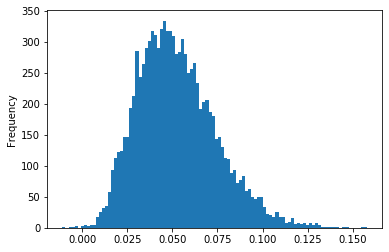

In [55]:
%matplotlib inline
results_df['WACC'].plot.hist(bins=100)

In [56]:
quants = [i/20 for i in range(1, 21)]
results_df.quantile(quants)

,Bond Price,Beta,Market Return,Tax Rate,WACC
0.05,81.248402,0.295842,0.042261,0.173192,0.020810
0.10,92.282709,0.369973,0.052837,0.191403,0.026815
0.15,100.055707,0.418251,0.060765,0.203323,0.030472
0.20,105.380702,0.456998,0.066423,0.213415,0.033687
0.25,110.351751,0.491311,0.071775,0.221411,0.036729
0.30,114.709896,0.521523,0.076475,0.229000,0.039379
0.35,118.488199,0.547630,0.080880,0.235835,0.042193
0.40,122.621343,0.573140,0.084687,0.242635,0.044928
0.45,126.743803,0.598108,0.088634,0.248711,0.047429
0.50,130.352323,0.625594,0.092555,0.254822,0.050145


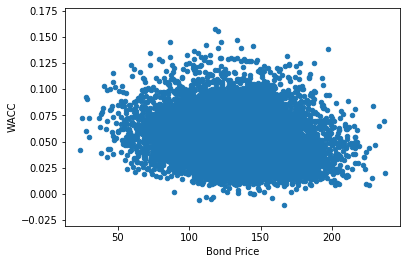

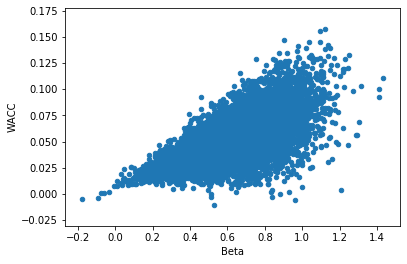

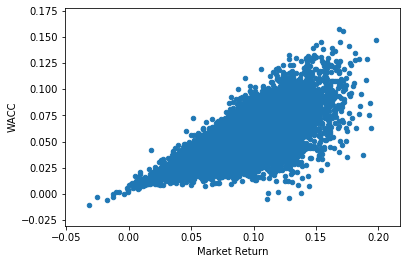

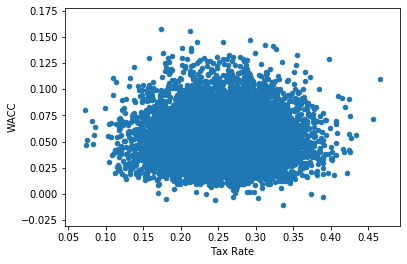

In [57]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt

def display_header(header):
    display(HTML(f'<h2>{header}</h2>'))
    
for x_var in ['Bond Price', 'Beta', 'Market Return', 'Tax Rate']:
    display_header(f'{x_var} vs. WACC')
    results_df.plot.scatter(x=x_var, y='WACC')
    plt.show()

In [58]:
model = sm.OLS(results_df['WACC'], results_df[['Bond Price', 'Beta', 'Market Return', 'Tax Rate']])
mc_ols_results = model.fit()
mc_ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   WACC   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          2.519e+05
Date:                Tue, 03 Dec 2019   Prob (F-statistic):                        0.00
Time:                        10:33:46   Log-Likelihood:                          37585.
No. Observations:               10000   AIC:                                 -7.516e+04
Df Residuals:                    9996   BIC:                                 -7.513e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bond Price       -0.0002   1.57e-06   -102.200      0.000      -0.000      -0.000
Beta              0.0653      0.000    245.669      0.000       0.065       0.066
Market Return     0.4694      0.002    274.297      0.000       0.466       0.473
Tax Rate         -0.0405      0.001    -46.745      0.000      -0.042      -0.039
==============================================================================
Omnibus:                      942.769   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6299.476
Skew:                           0.171   Prob(JB):                         0.00
Kurtosis:                       6.873   Cond. No.                     4.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
std_series = pd.Series([wmt_bond_price_std, beta_std, mkt_ret_std, tax_rate_std], index=['Bond Price', 'Beta', 'Market Return', 'Tax Rate'])
std_series

Bond Price       30.00
Beta              0.20
Market Return     0.03
Tax Rate          0.05
dtype: float64

In [60]:
mc_ols_results.params

Bond Price      -0.000160
Beta             0.065293
Market Return    0.469410
Tax Rate        -0.040475
dtype: float64

In [61]:
mc_ols_results.params * std_series

Bond Price      -0.004814
Beta             0.013059
Market Return    0.014082
Tax Rate        -0.002024
dtype: float64

The beta and market return have the greatest effect. Tax rate has very little effect.